In [47]:
# import dependencies
import pathlib as path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
# read in csv files for 2022 and 2018 into dataframes
df = pd.read_csv("Resources/cleaned_billionaire.csv")
df.head()

,rank,personName,age,finalWorth,category,country,selfMade,gender
0,1,Elon Musk,50.0,219000,Automotive,United States,True,M
1,2,Jeff Bezos,58.0,171000,Technology,United States,True,M
2,3,Bernard Arnault & family,73.0,158000,Fashion & Retail,France,False,M
3,4,Bill Gates,66.0,129000,Technology,United States,True,M
4,5,Warren Buffett,91.0,118000,Finance & Investments,United States,True,M


In [49]:
# Check the statistical summary of the columns
df.describe().round(2)

,rank,age,finalWorth
count,2576.00,2576.00,2576.00
mean,1299.85,64.21,4799.09
std,747.07,13.40,10688.05
min,1.00,19.00,1000.00
25%,654.00,55.00,1500.00
50%,1292.00,64.00,2400.00
75%,1929.00,74.00,4400.00
max,2578.00,100.00,219000.00


In [50]:
# change the gender column into values
df_encoded = pd.get_dummies(df, columns=["gender", "selfMade"])
df_encoded.head()

,rank,personName,age,finalWorth,category,country,gender_F,gender_M,selfMade_False,selfMade_True
0,1,Elon Musk,50.0,219000,Automotive,United States,0,1,0,1
1,2,Jeff Bezos,58.0,171000,Technology,United States,0,1,0,1
2,3,Bernard Arnault & family,73.0,158000,Fashion & Retail,France,0,1,1,0
3,4,Bill Gates,66.0,129000,Technology,United States,0,1,0,1
4,5,Warren Buffett,91.0,118000,Finance & Investments,United States,0,1,0,1


## Analyze Gender

In [51]:
# find total M and F counts
gender_counts = df_encoded[["gender_F", "gender_M"]].sum()

gender_counts

gender_F     288
gender_M    2288
dtype: int64

In [52]:
# find total gender counts
total_gender = gender_counts.sum()

print(f"Total Gender Count: {total_gender}")


Total Gender Count: 2576


In [53]:
perc_gender = (gender_counts/total_gender * 100).round(2)
perc_gender

gender_F    11.18
gender_M    88.82
dtype: float64

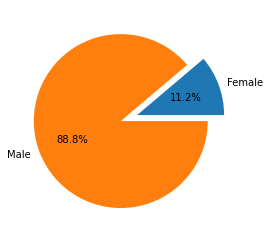

In [74]:
# create a pie chart showing the % of male vs female results
label = ["Female", "Male"]
explode = [0,.2]
plt.pie(perc_gender,labels=label, autopct="%1.1f%%",explode=explode)
plt.show()


## Analyze Age

In [102]:
# find the mean, median, and mode for age

age_statistics = df_encoded["age"].describe().round(2)
mode_age = df_encoded["age"].mode().round(2)
median_age = df_encoded["age"].median()

print(f"Age Summary: \n{age_statistics}")
print(f"\n")
print(f"Mode Age: \n{mode_age}")
print(f"\n")
print(f"Median Age: {median_age}")

Age Summary: 
count    2576.00
mean       64.21
std        13.40
min        19.00
25%        55.00
50%        64.00
75%        74.00
max       100.00
Name: age, dtype: float64


Mode Age: 
0    57.0
1    59.0
dtype: float64


Median Age: 64.0


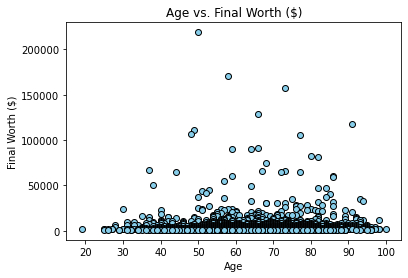

In [110]:
# Create an age scatter plot

x = df_encoded["age"]
y = df_encoded["finalWorth"]

plt.scatter(x,y, c='skyblue', linewidth=1, marker='o', edgecolors="black")
plt.xlabel('Age')
plt.ylabel('Final Worth ($)')
plt.title('Age vs. Final Worth ($)')
plt.show()

## Analyze the industry category

In [119]:
df_encoded.head()

,rank,personName,age,finalWorth,category,country,gender_F,gender_M,selfMade_False,selfMade_True
0,1,Elon Musk,50.0,219000,Automotive,United States,0,1,0,1
1,2,Jeff Bezos,58.0,171000,Technology,United States,0,1,0,1
2,3,Bernard Arnault & family,73.0,158000,Fashion & Retail,France,0,1,1,0
3,4,Bill Gates,66.0,129000,Technology,United States,0,1,0,1
4,5,Warren Buffett,91.0,118000,Finance & Investments,United States,0,1,0,1


In [122]:
# Analyze the industry category information by age, final worth, gender, and self made
industry_df = pd.DataFrame(df_encoded.iloc[0:2576, [3,4,5,6,7,8,9]])

industry_df.head()

,finalWorth,category,country,gender_F,gender_M,selfMade_False,selfMade_True
0,219000,Automotive,United States,0,1,0,1
1,171000,Technology,United States,0,1,0,1
2,158000,Fashion & Retail,France,0,1,1,0
3,129000,Technology,United States,0,1,0,1
4,118000,Finance & Investments,United States,0,1,0,1


In [125]:
# group by the industry to see what the total worth is of each category to find any relationships
industry = industry_df.groupby(['category']).sum()
industry

,finalWorth,gender_F,gender_M,selfMade_False,selfMade_True
category,,,,,
Automotive,571900,4.0,63.0,26.0,41.0
Construction & Engineering,119700,6.0,39.0,20.0,25.0
Diversified,905700,27.0,147.0,91.0,83.0
Energy,393400,8.0,85.0,24.0,69.0
Fashion & Retail,1538000,32.0,209.0,90.0,151.0
Finance & Investments,1711800,24.0,358.0,89.0,293.0
Food & Beverage,905050,37.0,157.0,91.0,103.0
Gambling & Casinos,107600,4.0,19.0,4.0,19.0
Healthcare,701300,30.0,179.0,60.0,149.0


In [129]:
# create a group based on the values in the 'category' column
category_group = df.groupby('category')

# count how many times each category appears in our group
category_count = category_group['category'].count()

category_count

category
Automotive                     67
Construction & Engineering     45
Diversified                   174
Energy                         93
Fashion & Retail              241
Finance & Investments         382
Food & Beverage               194
Gambling & Casinos             23
Healthcare                    209
Logistics                      32
Manufacturing                 321
Media & Entertainment          95
Metals & Mining                65
Real Estate                   187
Service                        52
Sports                         27
Technology                    332
Telecom                        37
Name: category, dtype: int64

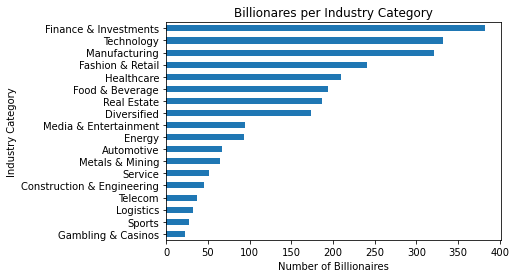

<Figure size 432x288 with 0 Axes>

In [133]:

# chart the industry information on a bar graph

# Create a bar chart based off of the group series from before
industry_chart = category_count.sort_values().plot(kind='barh')

# Set the xlabel and ylabel using class methods
industry_chart.set_xlabel("Number of Billionaires")
industry_chart.set_ylabel("Industry Category")
plt.title("Billionares per Industry Category")


plt.show()
plt.tight_layout()

In [ ]:
# create a boxplot showcasing total networth for 2018 and 2022